In [0]:
#ライブラリの読み込み
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from subprocess import call
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [0]:
#グラフの設定
plt.style.use('ggplot')
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (15,10)

In [0]:
#データ（CSVファイル）の読み込み
train = pd.read_table("https://raw.githubusercontent.com/TakatoMatsumoto/data_policy_studies/master/chapter_2/input/train.tsv", low_memory=False)
test = pd.read_table("https://raw.githubusercontent.com/TakatoMatsumoto/data_policy_studies/master/chapter_2/input/test.tsv", low_memory=False)

In [36]:
#データの表示
train

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Y
0,5,90,Private,313986,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
1,10,46,Private,74895,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1485,55,United-States,<=50K
2,11,37,Private,67433,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,>50K
3,13,45,Local-gov,144940,Masters,14,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,<=50K
4,14,40,Private,272960,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,42,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,32552,42,Private,83411,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Male,0,1408,40,United-States,<=50K
16276,32553,59,Self-emp-not-inc,223131,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,60,United-States,<=50K
16277,32554,42,Private,142424,Assoc-voc,11,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16278,32555,19,?,119234,Some-college,10,Never-married,?,Other-relative,White,Female,0,0,15,United-States,<=50K


In [0]:
#データの前処理
X_train = train.drop(["Y"], axis=1)
y_train = train["Y"].values
X_test = test
X_traintest = pd.concat([X_train, X_test], axis=0)

In [0]:
#カテゴリ変数(文字列)を決定木分析に適したOne hotエンコードする
category_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
X_traintest = pd.get_dummies(X_traintest, columns=category_features, sparse=True)

カテゴリ変数を1: "True", 0: "False"として変換しています。
例えば、日本生まれの人はnative-country_Japanが1となります。  
One hot encodingについての記事: https://qiita.com/nomuyoshi/items/c8127787c4ce320729da

In [39]:
#エンコード後のデータの表示
X_traintest

,id,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,...,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,5,90,313986,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,10,46,74895,12,0,1485,55,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,11,37,67433,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,13,45,144940,14,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,14,40,272960,12,0,0,42,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,32549,59,372020,13,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16277,32556,21,154422,10,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
16278,32558,59,175689,10,0,0,14,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16279,32559,57,370890,9,0,2258,40,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [0]:
#決定木に学習させる特徴量を設定
#全ての情報を使って学習
X_traintest = X_traintest

In [0]:
X_train = X_traintest.iloc[:train.shape[0], :]
X_test = X_traintest.iloc[train.shape[0]:, :]

In [0]:
#決定木のパラメータを設定
#最大深さを５に設定
params = {
    'criterion': 'gini', 
    'max_features': 'auto',
    'max_depth': 5, 
    'max_leaf_nodes': None,
    'random_state': 0,
}

In [43]:
#決定木の作成
model = DecisionTreeClassifier(**params)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[Text(418.5, 475.65000000000003, 'marital-status_Married-civ-spouse <= 0.5\ngini = 0.37\nsamples = 16280\nvalue = [12288, 3992]\nclass = <=50K'),
 Text(209.25, 339.75, 'education_Prof-school <= 0.5\ngini = 0.127\nsamples = 8827\nvalue = [8223, 604]\nclass = <=50K'),
 Text(104.625, 203.85000000000002, 'education_Masters <= 0.5\ngini = 0.121\nsamples = 8740\nvalue = [8175, 565]\nclass = <=50K'),
 Text(52.3125, 67.94999999999999, '\n  (...)  \n'),
 Text(156.9375, 67.94999999999999, '\n  (...)  \n'),
 Text(313.875, 203.85000000000002, 'capital-gain <= 3625.0\ngini = 0.495\nsamples = 87\nvalue = [48, 39]\nclass = <=50K'),
 Text(261.5625, 67.94999999999999, '\n  (...)  \n'),
 Text(366.1875, 67.94999999999999, '\n  (...)  \n'),
 Text(627.75, 339.75, 'age <= 33.5\ngini = 0.496\nsamples = 7453\nvalue = [4065, 3388]\nclass = <=50K'),
 Text(523.125, 203.85000000000002, 'education_Masters <= 0.5\ngini = 0.408\nsamples = 1754\nvalue = [1254, 500]\nclass = <=50K'),
 Text(470.8125, 67.94999999999999,

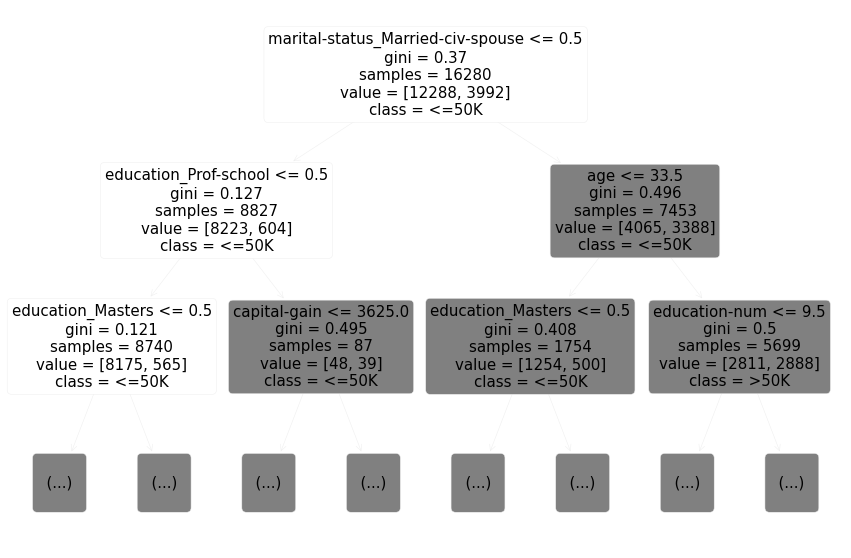

In [51]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(model,
               feature_names=X_traintest.columns,
               class_names=['<=50K','>50K'],
               max_depth=2, #グラフが見にくくならないように調整
               fontsize=15,
               rounded=True)

In [45]:
#Accuracyが高いほど良い精度で予測ができています、過学習に注意
#トレーニングデータを学習して，トレーニングデータで評価を行った時のAccuracy

y_pred = model.predict(X_train)
print('Training accuracy: {}'.format(accuracy_score(y_pred, y_train)))

Training accuracy: 0.8242014742014742


In [0]:
#予測
test_pred = model.predict(X_test)

In [0]:
#サブミット用ファイルの出力
sub_df = pd.DataFrame({"id": test["id"].values,"Y": test_pred})
sub_df.to_csv("submission.csv", index = False, header=False)

In [48]:
sub_df

,id,Y
0,0,<=50K
1,1,<=50K
2,2,<=50K
3,3,>50K
4,4,<=50K
...,...,...
16276,32549,>50K
16277,32556,<=50K
16278,32558,>50K
16279,32559,<=50K


outputフォルダにあるsubmission.csvをSignateに投稿して順位を競ってみましょう。  
決定木のパラメータやモデルに使う変数を適したものにすることで、予測精度が向上します。